## Time Series Analysis and Forecasting
# CHALLENGE

### Alice Gatti

From lecture 5, 19th October 2021. 

### Given plot (R)

Given plot, created in R:

![given plot (in R)](givenPlotWeek.png "given plot (in R)")

_CHALLENGE_: recreate it in Python.

The dataset is contained in the R library *fpp3* and is called *vic_elec*. For this reason, I renamed the file *electricity.csv* to *vic_elec.csv*.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
# Retrieve the data
data = pd.read_csv('vic_elec.csv', index_col='Time', parse_dates=True)
print(data.head())

                                Demand  Temperature        Date  Holiday
Time                                                                    
2011-12-31 13:00:00+00:00  4382.825174        21.40  2012-01-01     True
2011-12-31 13:30:00+00:00  4263.365526        21.05  2012-01-01     True
2011-12-31 14:00:00+00:00  4048.966046        20.70  2012-01-01     True
2011-12-31 14:30:00+00:00  3877.563330        20.55  2012-01-01     True
2011-12-31 15:00:00+00:00  4036.229746        20.40  2012-01-01     True


### Note: To skip the step-by-step solution, just run the last cell

In [3]:
# Drop the unused columns (mostly for mental order)
df = data.drop(columns=['Temperature', 'Date', 'Holiday'])
print(df.head())

                                Demand
Time                                  
2011-12-31 13:00:00+00:00  4382.825174
2011-12-31 13:30:00+00:00  4263.365526
2011-12-31 14:00:00+00:00  4048.966046
2011-12-31 14:30:00+00:00  3877.563330
2011-12-31 15:00:00+00:00  4036.229746


In [4]:
# Show the index of the time series
print(df.index)

DatetimeIndex(['2011-12-31 13:00:00+00:00', '2011-12-31 13:30:00+00:00',
               '2011-12-31 14:00:00+00:00', '2011-12-31 14:30:00+00:00',
               '2011-12-31 15:00:00+00:00', '2011-12-31 15:30:00+00:00',
               '2011-12-31 16:00:00+00:00', '2011-12-31 16:30:00+00:00',
               '2011-12-31 17:00:00+00:00', '2011-12-31 17:30:00+00:00',
               ...
               '2014-12-31 08:00:00+00:00', '2014-12-31 08:30:00+00:00',
               '2014-12-31 09:00:00+00:00', '2014-12-31 09:30:00+00:00',
               '2014-12-31 10:00:00+00:00', '2014-12-31 10:30:00+00:00',
               '2014-12-31 11:00:00+00:00', '2014-12-31 11:30:00+00:00',
               '2014-12-31 12:00:00+00:00', '2014-12-31 12:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Time', length=52608, freq=None)


In [5]:
# Show the oldest date available (the dataset is ordered from oldest to newest)
print(df.index[0])

2011-12-31 13:00:00+00:00


In [6]:
# Get the first date
firstday = df.index[0]
y0 = firstday.year
m0 = firstday.month
d0 = firstday.day
print(y0, m0, d0)

2011 12 31


In [7]:
# weekdays (usual)
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# NOTE: their index will be: 0, 1, 2, 3, 4, 5, 6. E.g., day 6 = Sunday

nDay = date(y0,m0,d0).weekday()
dDay = weekDays[nDay]

print(dDay)

Saturday


In [8]:
# x-Labels is the dataset (will be placed on the x-axis)
xlabels = weekDays[nDay+1:] + weekDays[:nDay+1]
print(xlabels)

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


In [9]:
# Calculate the delta between the oldest day and all the days in the dataset
# In this way, we have "the right count" on the available days
# "Count observations" was not good since each day has multiple observations
deltas = df.index - df.index[0]
print(deltas)

TimedeltaIndex([   '0 days 00:00:00',    '0 days 00:30:00',
                   '0 days 01:00:00',    '0 days 01:30:00',
                   '0 days 02:00:00',    '0 days 02:30:00',
                   '0 days 03:00:00',    '0 days 03:30:00',
                   '0 days 04:00:00',    '0 days 04:30:00',
                ...
                '1095 days 19:00:00', '1095 days 19:30:00',
                '1095 days 20:00:00', '1095 days 20:30:00',
                '1095 days 21:00:00', '1095 days 21:30:00',
                '1095 days 22:00:00', '1095 days 22:30:00',
                '1095 days 23:00:00', '1095 days 23:30:00'],
               dtype='timedelta64[ns]', name='Time', length=52608, freq=None)


In [10]:
# take the delta and divide (integer division) it by 7. It will return the weeks.
# So, each day is assigned to a week, according to the result of the division 
# (e.g. day 1 in week 1, day 40 in week 5, ...)
# NOTE: weeks are calculated by dividing by 7 from the first day (which may not be a monday, for example)
week = deltas.days // 7
week.name = "Week"
print(week)

Int64Index([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            ...
            156, 156, 156, 156, 156, 156, 156, 156, 156, 156],
           dtype='int64', name='Week', length=52608)


In [11]:
# convert week in "time delta" (absolute differences in times)
# so, we convert week in days
# above, we had 156 weeks, and 156*7 = 1092 days
# so, we compute the difference in days between start and end keeping in consideration the week division
weekToDays = pd.to_timedelta(week, 'w')
print(weekToDays)

TimedeltaIndex([   '0 days',    '0 days',    '0 days',    '0 days',
                   '0 days',    '0 days',    '0 days',    '0 days',
                   '0 days',    '0 days',
                ...
                '1092 days', '1092 days', '1092 days', '1092 days',
                '1092 days', '1092 days', '1092 days', '1092 days',
                '1092 days', '1092 days'],
               dtype='timedelta64[ns]', name='Week', length=52608, freq=None)


In [12]:
# composition of weeks
# we assign each observation to a specific week
# output will be something like "0th day of week", "3rd day of week", ... and the time stamp
# Basically, we tell python which week each day belongs to 
valuesToWeeks = deltas - weekToDays
valuesToWeeks.name = "Time"
print(valuesToWeeks)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:30:00', '0 days 01:00:00',
                '0 days 01:30:00', '0 days 02:00:00', '0 days 02:30:00',
                '0 days 03:00:00', '0 days 03:30:00', '0 days 04:00:00',
                '0 days 04:30:00',
                ...
                '3 days 19:00:00', '3 days 19:30:00', '3 days 20:00:00',
                '3 days 20:30:00', '3 days 21:00:00', '3 days 21:30:00',
                '3 days 22:00:00', '3 days 22:30:00', '3 days 23:00:00',
                '3 days 23:30:00'],
               dtype='timedelta64[ns]', name='Time', length=52608, freq=None)


In [13]:
# creation of a pandas series with valuesToWeeks, Week and Demand
# it is used in order to have both the original timing and the assigned week as index for each observation
series = pd.Series(
    data = df.Demand.values,  # values of the Demand
    index = [valuesToWeeks, week]  # time
)

print(series)

Time             Week
0 days 00:00:00  0       4382.825174
0 days 00:30:00  0       4263.365526
0 days 01:00:00  0       4048.966046
0 days 01:30:00  0       3877.563330
0 days 02:00:00  0       4036.229746
                            ...     
3 days 21:30:00  156     3873.448714
3 days 22:00:00  156     3791.637322
3 days 22:30:00  156     3724.835666
3 days 23:00:00  156     3761.886854
3 days 23:30:00  156     3809.414586
Length: 52608, dtype: float64


In [14]:
# now we need to unstack: 
# each different value of Week will "become a new column"
# e.g. week 0, 1, 2  -->  column week 0, column week 1, column week 2
unstacked = series.unstack().add_prefix('Week ')
print(unstacked)

Week                  Week 0       Week 1       Week 2       Week 3  \
Time                                                                  
0 days 00:00:00  4382.825174  4158.363480  4072.987128  4313.700680   
0 days 00:30:00  4263.365526  4057.875502  3995.703476  4183.763132   
0 days 01:00:00  4048.966046  3847.944814  3793.431306  3959.983968   
0 days 01:30:00  3877.563330  3678.146058  3633.647594  3822.172526   
0 days 02:00:00  4036.229746  3866.218622  3823.452058  4044.221672   
...                      ...          ...          ...          ...   
6 days 21:30:00  4352.210560  4220.676864  4612.439838  5536.037704   
6 days 22:00:00  4245.589862  4126.964432  4483.370174  5311.417022   
6 days 22:30:00  4142.156188  4006.865454  4334.716478  5070.581592   
6 days 23:00:00  4070.875086  3934.266706  4241.266684  4869.107888   
6 days 23:30:00  4021.279808  3901.728714  4196.212488  4719.481546   

Week                  Week 4       Week 5       Week 6       Week 7  \
Time 

<ipython-input-15-d83233345d74>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


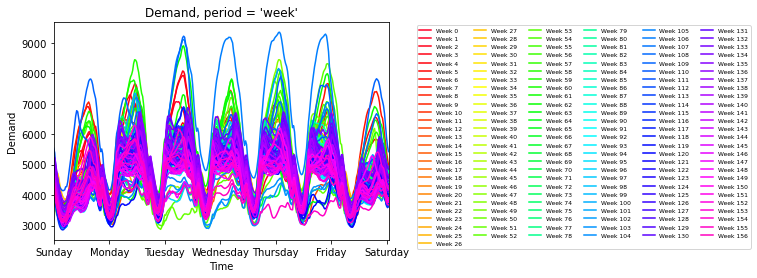

In [15]:
# plot
ax = unstacked.plot(colormap='gist_rainbow')

# set labels for x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = xlabels
ax.set_xticklabels(labels)
# label for y-axis
plt.ylabel("Demand")

# set legend
# 6 columns, loc where to put it, font size, where to translate it
plt.legend(ncol=6, loc="upper left", prop={'size': 6}, bbox_to_anchor=(1.075, 1))

# set title
plt.title("Demand, period = 'week'")

plt.show()

### Compact solution 

<ipython-input-16-14cc57c1f6ab>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


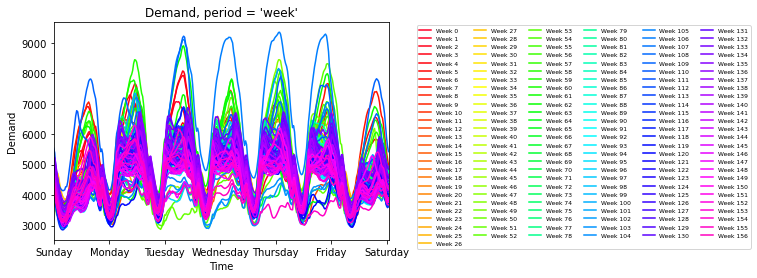

In [16]:
# This function contains everything
def plotweeks(d):

    # Get the first day
    firstday = d.index[0]
    y0 = firstday.year
    m0 = firstday.month
    d0 = firstday.day
    weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    nDay = date(y0,m0,d0).weekday()
    dDay = weekDays[nDay]

    # x-Labels which will be placed on the x-axis
    xlabels = weekDays[nDay+1:] + weekDays[:nDay+1]
    
    # calculations to prepare data for plotting
    deltas = d.index - d.index[0]
    week = deltas.days // 7
    week.name = "Week"
    weekToDays = pd.to_timedelta(week, 'w')
    valuesToWeeks = deltas - weekToDays
    valuesToWeeks.name = "Time"

    # series with valuesToWeeks, Week and Demand
    series = pd.Series(
        data = d.Demand.values,
        index = [valuesToWeeks, week]
    )

    # unstack -> divide weeks
    unstacked = series.unstack().add_prefix('Week ')
    
    # plot
    ax = unstacked.plot(colormap='gist_rainbow')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = xlabels
    ax.set_xticklabels(labels)
    plt.ylabel("Demand")
    plt.legend(ncol=6, loc="upper left", prop={'size': 6}, bbox_to_anchor=(1.075, 1))
    plt.title("Demand, period = 'week'")
    plt.show()

    return None

plotweeks(data)

Note: this plot starts with Sunday, while the given one starts with Monday, but this was the best I could achieve.

Note2: part of this work was implemented using some online examples